## Originally, we proposed using the Mean Shift algorithm to attempt to segment the boat from the water. The assumption was that the water pixels were similar enough such that they would merge into a single "mean shifted" blob. This was our technique to do so, and we show why this ultimately did not work

In [2]:
from PIL import Image
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.filters import gaussian
import matplotlib.pyplot as plt
import numpy as np

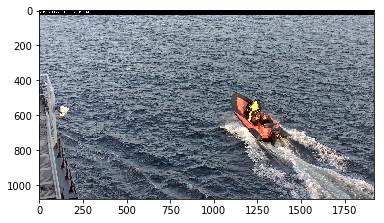

In [3]:
# Read in the image
im = Image.open("test_image.jpg")

# Convert image to numpy array
im = np.array(im)

# Display numpy array
plt.imshow(im)

/Users/brentredmon/Documents/School/Spring_2019/CS4379C/Final_Project/venv/lib/python3.6/site-packages/skimage/filters/_gaussian.py:122: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


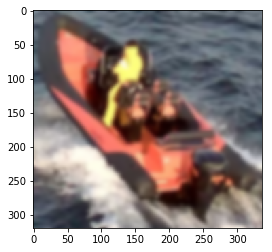

In [127]:
# Read in the image
im = Image.open("test_image.jpg")

# Declare bounding box
crop_rectangle = (1095, 468, 1432, 788)

# Crop the image around the bounding box
im = im.crop(crop_rectangle)

# Convert cropped image to numpy array
im = np.array(im)

# Change the sigma to change the amount of gaussian blur
im = gaussian(im, sigma=3)
original_shape = im.shape

# Display numpy array
plt.imshow(im)

In [132]:
# Reshape im. This is what we'll perform Mean Shift on
X = np.reshape(im, [-1, 3])

# Estimate the bandwidth of the image, which will be fed into Mean Shift
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)

In [133]:
# Now perform Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=0.1399751589684107, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=None, seeds=None)

In [134]:
labels = ms.labels_
segmented_image = np.reshape(labels, original_shape[:2])  # Just take size, ignore RGB channels.

(-0.5, 336.5, 319.5, -0.5)

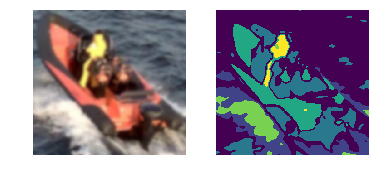

In [135]:
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.axis('off')

## We see that the distribution of colors across the water pixels are just too differnet for the mean shift algorithm to effectively separate from the boat. 